Prepare rules for the all the data sets - "book"
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import warnings

In [2]:
# Suppress Warnings
warnings.filterwarnings('ignore')

In [3]:
# Load Dataset
df = pd.read_csv('book.csv')

### EDA

In [4]:
# Display the top few rows of the DataFrame
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [5]:
# Display the bottom few rows of the DataFrame
df.tail()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0
1999,0,0,0,0,0,0,0,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


Inference drawn:

- Data Types: All columns in the DataFrame have the data type int64, indicating that they contain integer values.

- Non-Null Counts:There are a total of 2000 entries (rows) in the DataFrame. Each column has 2000 non-null values, indicating that there are no missing values in any of the columns.

The DataFrame is clean with no missing values, and it consists of 11 columns, each representing a book category with binary values (0 or 1) indicating whether a customer purchased a book from that category or not. The data types are appropriate for the given binary nature of the data.

In [7]:
df.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Inference drawn from the df.describe()

- Mean:The mean for "ChildBks" is approximately 0.423, indicating that, on average, 42.3% of customers purchased children's books.

- Standard Deviation:The standard deviation provides a measure of the dispersion or spread of values in each column. Higher standard deviation values indicate greater variability.For instance, "CookBks" and "GeogBks" have relatively higher standard deviations compared to some other columns.

- Minimum (min) and Maximum (max):The minimum and maximum values are 0 and 1, respectively, for all columns. This aligns with the binary nature of the data, where 0 indicates no purchase, and 1 indicates a purchase.

- Percentiles (25%, 50%, 75%): The percentiles provide insights into the distribution of values.For example, at the 75th percentile (Q3), "CookBks" has a value of 1, suggesting that 75% of customers purchased cooking books.

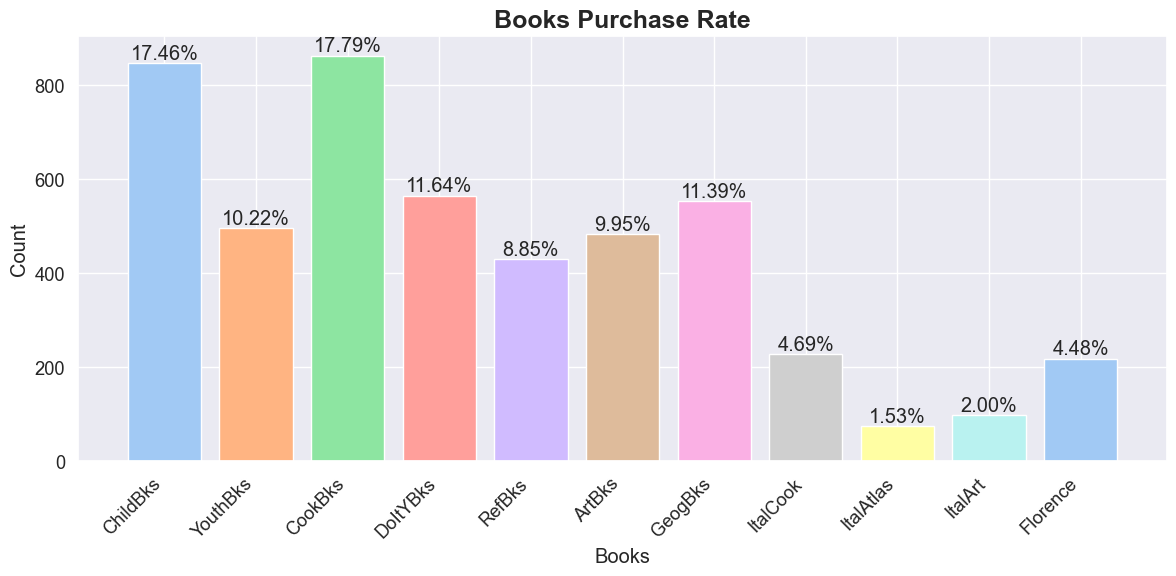

In [8]:
# Visualization of data
plt.figure(figsize=(12, 6))
sns.set(font_scale=1.2)
colors = sns.color_palette('pastel')[0:len(df.columns)]

# Create a vertical bar chart with rotated labels
bars = plt.bar(df.columns, df.sum(), color=colors)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels

# Add labels and title
plt.xlabel('Books')
plt.ylabel('Count')
plt.title('Books Purchase Rate', fontsize=18, fontweight='bold')

# Add percentages on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{yval/df.sum().sum()*100:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

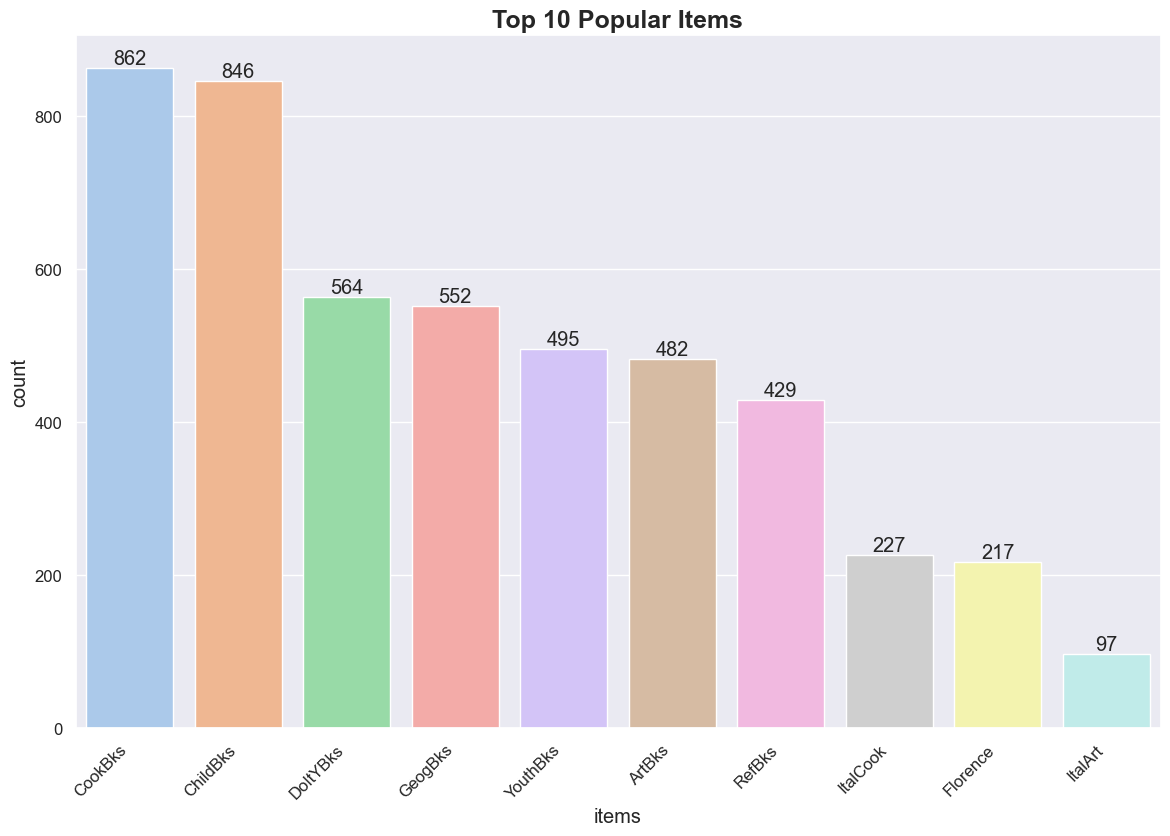

In [9]:
# Horizontal bar plot for top 10 popular items
count = df.sum().sort_values(ascending=False).reset_index().rename(columns={'index': 'items', 0: 'count'})
plt.figure(figsize=(14, 9))
pastel_colors = sns.color_palette('pastel')[:10]  # Use pastel colors for the top 10 items
ax = sns.barplot(x='items', y='count', data=count.head(10), palette=pastel_colors)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Top 10 Popular Items', fontsize=18, fontweight='bold')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Inference drawn: Most Frequent Bought Books are Cooking books and Child books

In [10]:
# Support and Length
# If we divide all items with row number, we can find the Support value. Our threshold value is 0.2 for the Support value.
first = pd.DataFrame(df.sum() / df.shape[0], columns=["Support"]).sort_values("Support", ascending=False)

In [11]:
# Elimination by Support Value
support_thresholds = [0.10, 0.15, 0.20]

for threshold in support_thresholds:
    print(f"\nElimination by Support Value (Threshold: {threshold})")
    print(first[first.Support >= threshold])


Elimination by Support Value (Threshold: 0.1)
          Support
CookBks    0.4310
ChildBks   0.4230
DoItYBks   0.2820
GeogBks    0.2760
YouthBks   0.2475
ArtBks     0.2410
RefBks     0.2145
ItalCook   0.1135
Florence   0.1085

Elimination by Support Value (Threshold: 0.15)
          Support
CookBks    0.4310
ChildBks   0.4230
DoItYBks   0.2820
GeogBks    0.2760
YouthBks   0.2475
ArtBks     0.2410
RefBks     0.2145

Elimination by Support Value (Threshold: 0.2)
          Support
CookBks    0.4310
ChildBks   0.4230
DoItYBks   0.2820
GeogBks    0.2760
YouthBks   0.2475
ArtBks     0.2410
RefBks     0.2145


### Association rules with 10% Support and 30% Confidence

In [12]:
# With 10% Support
frequent_itemsets1 = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets1['length'] = frequent_itemsets1['itemsets'].apply(lambda x: len(x))

# Display Support values
print("\nSupport values with 10% Support:")
print(frequent_itemsets1)


Support values with 10% Support:
    support                       itemsets  length
0    0.4230                     (ChildBks)       1
1    0.2475                     (YouthBks)       1
2    0.4310                      (CookBks)       1
3    0.2820                     (DoItYBks)       1
4    0.2145                       (RefBks)       1
5    0.2410                       (ArtBks)       1
6    0.2760                      (GeogBks)       1
7    0.1135                     (ItalCook)       1
8    0.1085                     (Florence)       1
9    0.1650           (ChildBks, YouthBks)       2
10   0.2560            (ChildBks, CookBks)       2
11   0.1840           (ChildBks, DoItYBks)       2
12   0.1515             (ChildBks, RefBks)       2
13   0.1625             (ChildBks, ArtBks)       2
14   0.1950            (ChildBks, GeogBks)       2
15   0.1620            (CookBks, YouthBks)       2
16   0.1155           (DoItYBks, YouthBks)       2
17   0.1010             (ArtBks, YouthBks)      

In [13]:
# Association rules with 30% Confidence
rules1 = association_rules(frequent_itemsets1, metric='confidence', min_threshold=0.3)

# Display rules
print("\nAssociation rules with 30% Confidence:")
print(rules1)


Association rules with 30% Confidence:
           antecedents         consequents  antecedent support  \
0           (ChildBks)          (YouthBks)              0.4230   
1           (YouthBks)          (ChildBks)              0.2475   
2           (ChildBks)           (CookBks)              0.4230   
3            (CookBks)          (ChildBks)              0.4310   
4           (ChildBks)          (DoItYBks)              0.4230   
..                 ...                 ...                 ...   
84   (GeogBks, ArtBks)           (CookBks)              0.1275   
85   (CookBks, ArtBks)           (GeogBks)              0.1670   
86  (GeogBks, CookBks)            (ArtBks)              0.1925   
87            (ArtBks)  (GeogBks, CookBks)              0.2410   
88           (GeogBks)   (CookBks, ArtBks)              0.2760   

    consequent support  support  confidence      lift  leverage  conviction  \
0               0.2475   0.1650    0.390071  1.576044  0.060308    1.233750   
1        

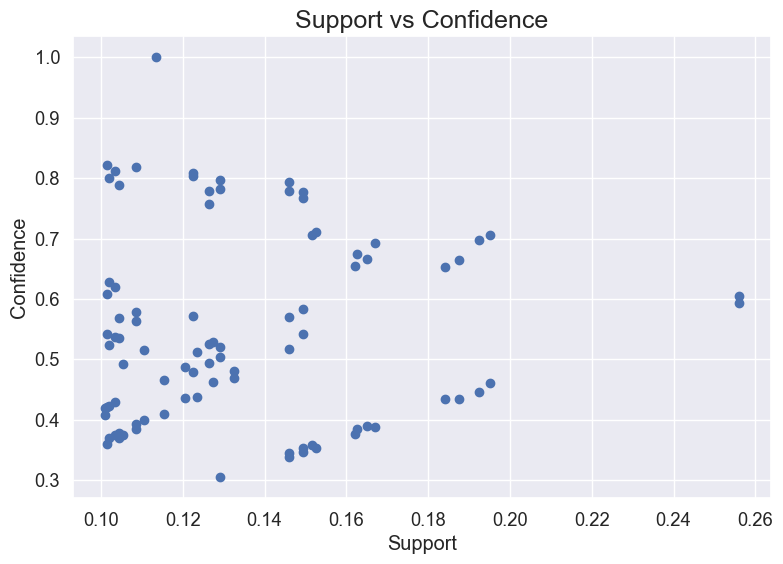

In [14]:
# Visualization of obtained rules
plt.figure(figsize=(9, 6))
plt.scatter(rules1['support'], rules1['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence', fontsize=18)
plt.show()

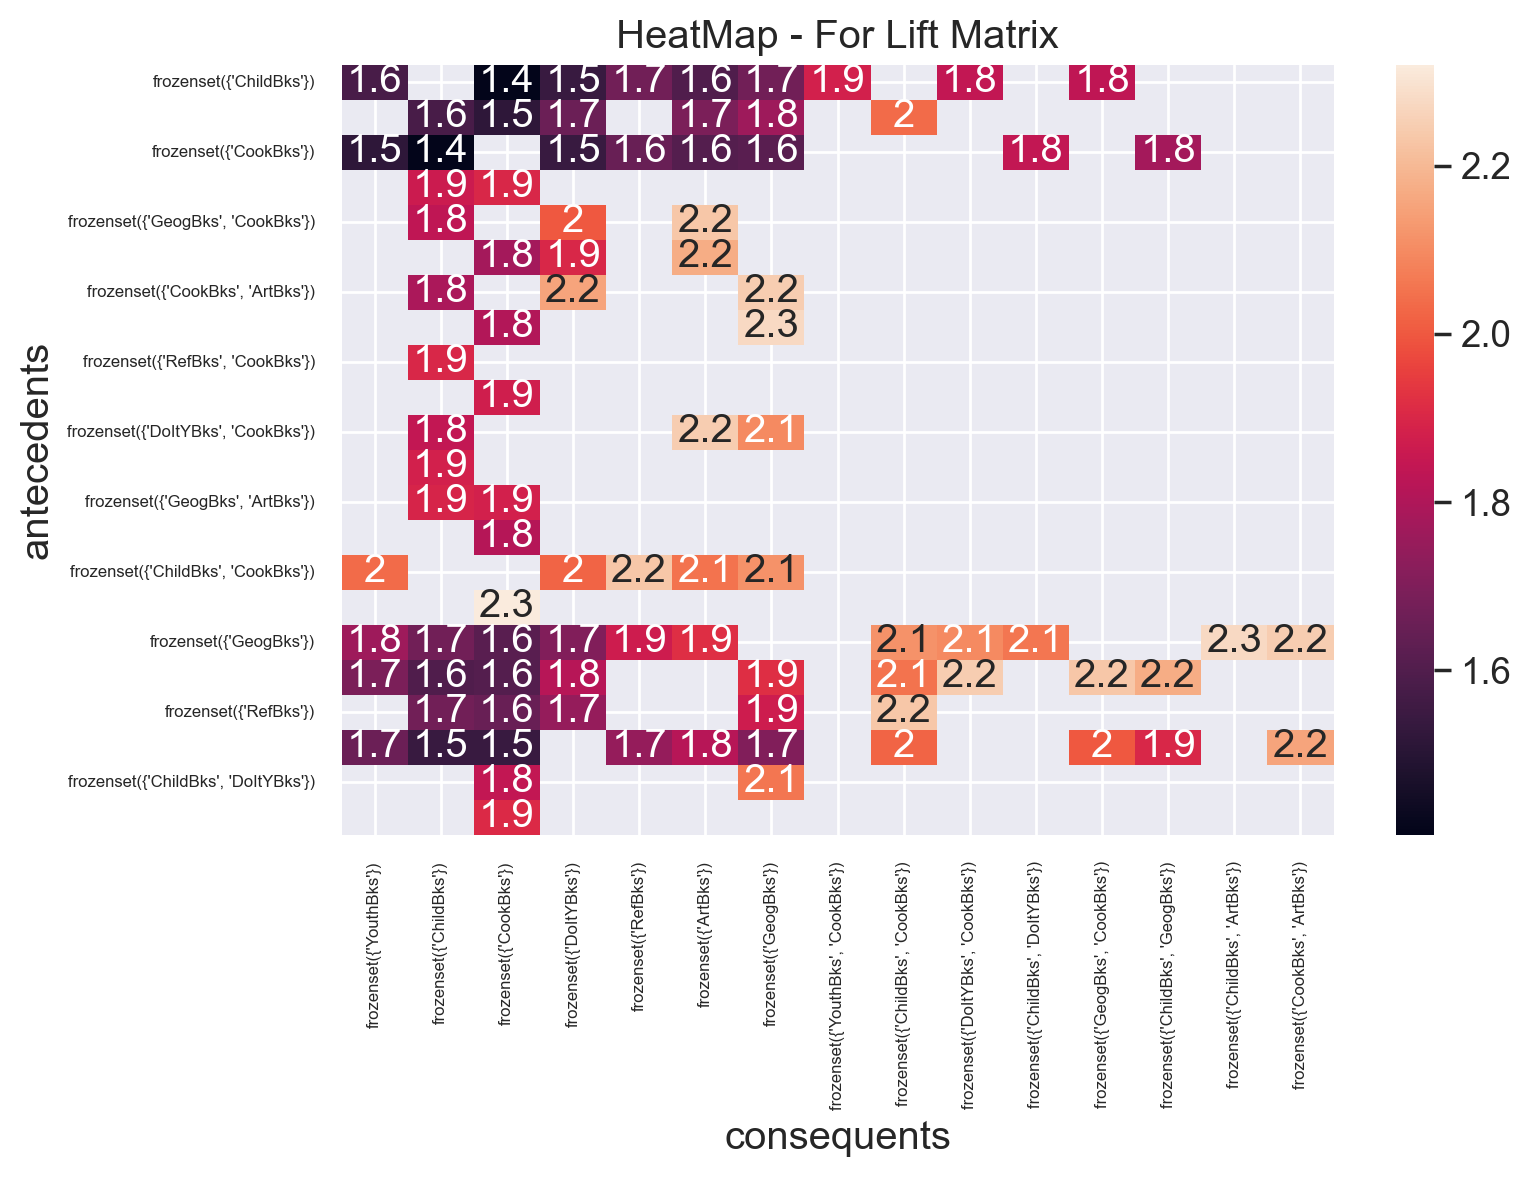

In [15]:
# Heatmap for Lift Matrix
matrix1 = rules1[rules1.lift > 1].pivot(index='antecedents', columns='consequents', values='lift')
plt.figure(figsize=(8, 5), dpi=200)
sns.heatmap(matrix1, annot=True)
plt.title('HeatMap - For Lift Matrix')
plt.yticks(rotation=0, fontsize=6)
plt.xticks(rotation=90, fontsize=6)
plt.show()

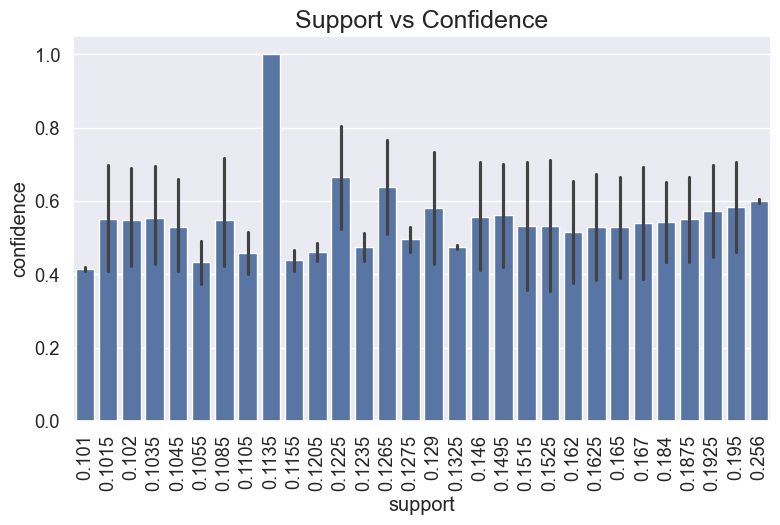

In [16]:
# Bar plot for Support vs Confidence
plt.figure(figsize=(9, 5), dpi=100)
sns.barplot(x="support", y="confidence", data=rules1)
plt.title("Support vs Confidence", fontsize=18)
plt.xticks(rotation=90)
plt.show()

### Similar approach for 15% Support and 40% Confidence

In [17]:
# With 15% Support
frequent_itemsets2 = apriori(df, min_support=0.15, use_colnames=True)
frequent_itemsets2['length'] = frequent_itemsets2['itemsets'].apply(lambda x: len(x))

# Display Support values
print("\nSupport values with 15% Support:")
print(frequent_itemsets2)


Support values with 15% Support:
    support              itemsets  length
0    0.4230            (ChildBks)       1
1    0.2475            (YouthBks)       1
2    0.4310             (CookBks)       1
3    0.2820            (DoItYBks)       1
4    0.2145              (RefBks)       1
5    0.2410              (ArtBks)       1
6    0.2760             (GeogBks)       1
7    0.1650  (ChildBks, YouthBks)       2
8    0.2560   (ChildBks, CookBks)       2
9    0.1840  (ChildBks, DoItYBks)       2
10   0.1515    (ChildBks, RefBks)       2
11   0.1625    (ChildBks, ArtBks)       2
12   0.1950   (ChildBks, GeogBks)       2
13   0.1620   (CookBks, YouthBks)       2
14   0.1875   (DoItYBks, CookBks)       2
15   0.1525     (RefBks, CookBks)       2
16   0.1670     (ArtBks, CookBks)       2
17   0.1925    (GeogBks, CookBks)       2


In [18]:
# Association rules with 40% Confidence
rules2 = association_rules(frequent_itemsets2, metric='confidence', min_threshold=0.4)

# Display rules
print("\nAssociation rules with 40% Confidence:")
print(rules2)


Association rules with 40% Confidence:
   antecedents consequents  antecedent support  consequent support  support  \
0   (YouthBks)  (ChildBks)              0.2475               0.423   0.1650   
1   (ChildBks)   (CookBks)              0.4230               0.431   0.2560   
2    (CookBks)  (ChildBks)              0.4310               0.423   0.2560   
3   (ChildBks)  (DoItYBks)              0.4230               0.282   0.1840   
4   (DoItYBks)  (ChildBks)              0.2820               0.423   0.1840   
5     (RefBks)  (ChildBks)              0.2145               0.423   0.1515   
6     (ArtBks)  (ChildBks)              0.2410               0.423   0.1625   
7   (ChildBks)   (GeogBks)              0.4230               0.276   0.1950   
8    (GeogBks)  (ChildBks)              0.2760               0.423   0.1950   
9   (YouthBks)   (CookBks)              0.2475               0.431   0.1620   
10  (DoItYBks)   (CookBks)              0.2820               0.431   0.1875   
11   (CookBk

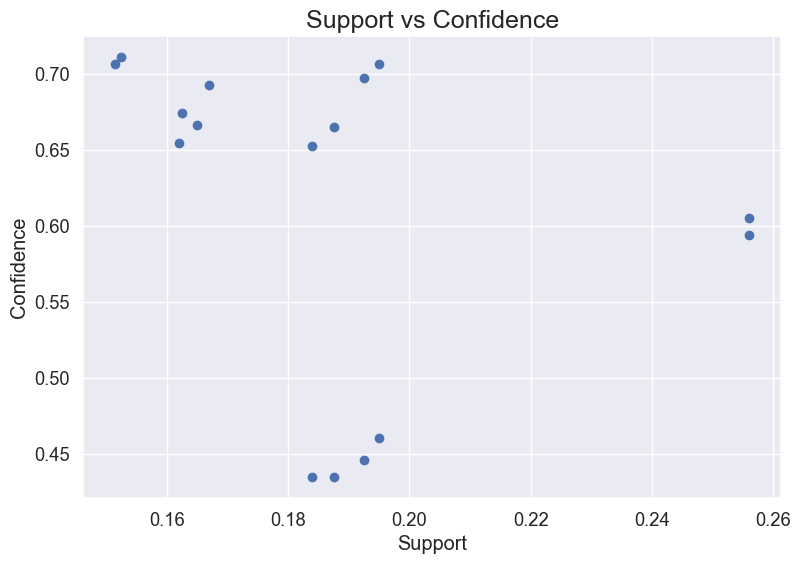

In [19]:
# Visualization of obtained rules
plt.figure(figsize=(9, 6))
plt.scatter(rules2['support'], rules2['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence', fontsize=18)
plt.show()

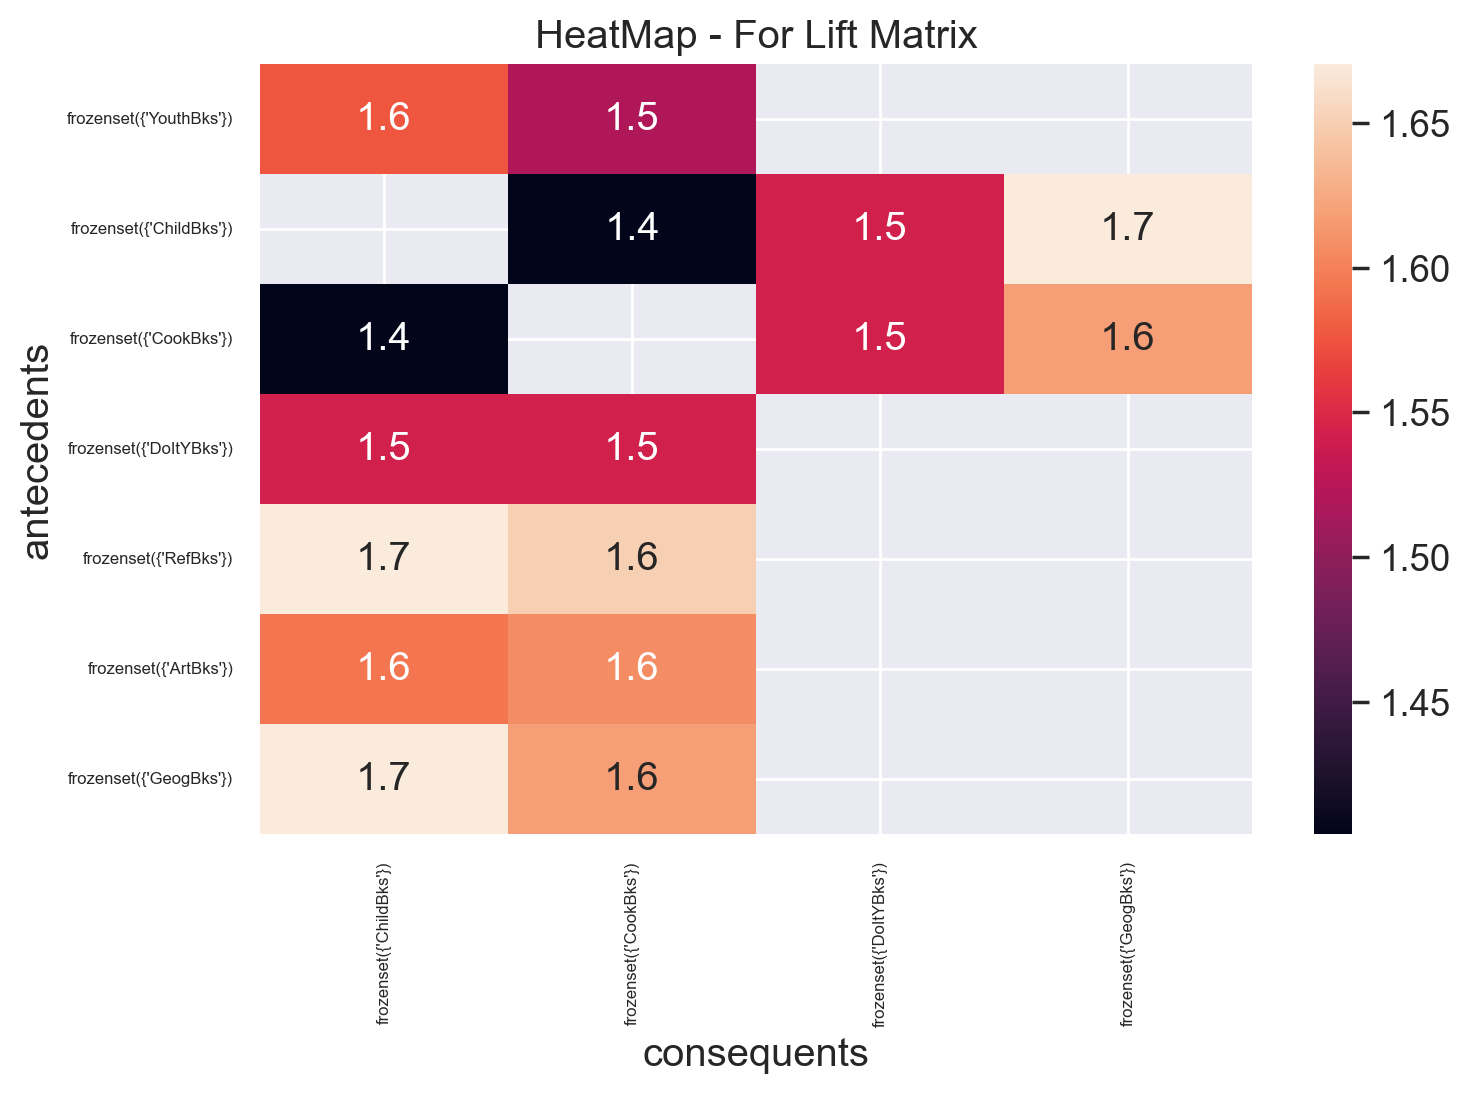

In [20]:
# Heatmap for Lift Matrix
matrix2 = rules2[rules2.lift > 1].pivot(index='antecedents', columns='consequents', values='lift')
plt.figure(figsize=(8, 5), dpi=200)
sns.heatmap(matrix2, annot=True)
plt.title('HeatMap - For Lift Matrix')
plt.yticks(rotation=0, fontsize=6)
plt.xticks(rotation=90, fontsize=6)
plt.show()

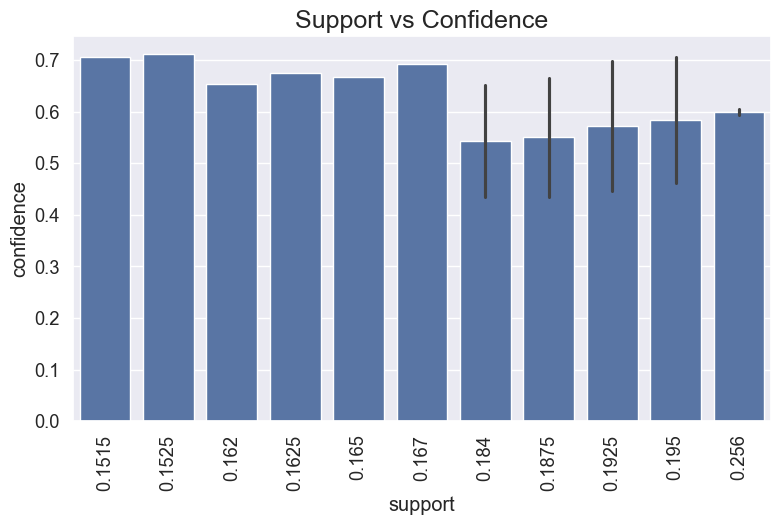

In [21]:
# Bar plot for Support vs Confidence
plt.figure(figsize=(9, 5), dpi=100)
sns.barplot(x="support", y="confidence", data=rules2)
plt.title("Support vs Confidence", fontsize=18)
plt.xticks(rotation=90)
plt.show()

### Similar approach for 20% Support and 60% Confidence

In [22]:
# With 20% Support
frequent_itemsets3 = apriori(df, min_support=0.2, use_colnames=True)
frequent_itemsets3['length'] = frequent_itemsets3['itemsets'].apply(lambda x: len(x))

# Display Support values
print("\nSupport values with 20% Support:")
print(frequent_itemsets3)


Support values with 20% Support:
   support             itemsets  length
0   0.4230           (ChildBks)       1
1   0.2475           (YouthBks)       1
2   0.4310            (CookBks)       1
3   0.2820           (DoItYBks)       1
4   0.2145             (RefBks)       1
5   0.2410             (ArtBks)       1
6   0.2760            (GeogBks)       1
7   0.2560  (ChildBks, CookBks)       2


In [23]:
# Association rules with 60% Confidence
rules3 = association_rules(frequent_itemsets3, metric='confidence', min_threshold=0.6)

# Display rules
print("\nAssociation rules with 60% Confidence:")
print(rules3)


Association rules with 60% Confidence:
  antecedents consequents  antecedent support  consequent support  support  \
0  (ChildBks)   (CookBks)               0.423               0.431    0.256   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.605201  1.404179  0.073687     1.44124       0.498856  


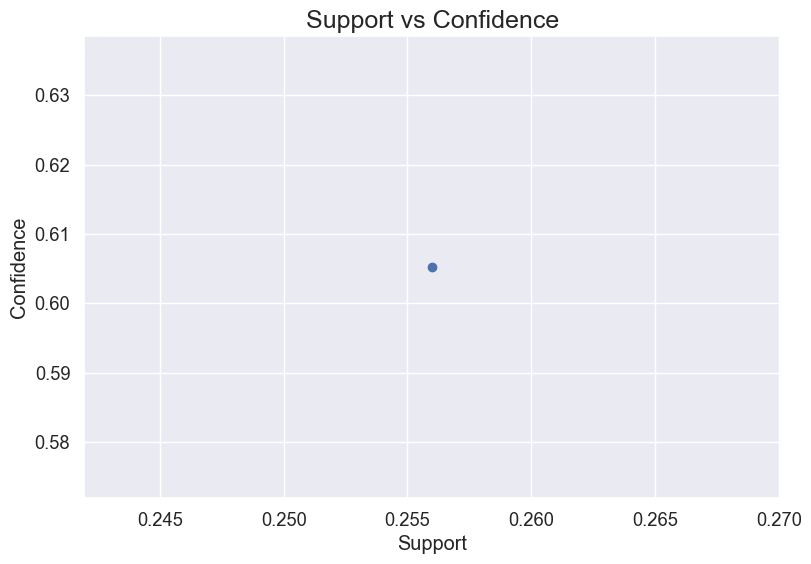

In [24]:
# Visualization of obtained rules
plt.figure(figsize=(9, 6))
plt.scatter(rules3['support'], rules3['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence', fontsize=18)
plt.show()

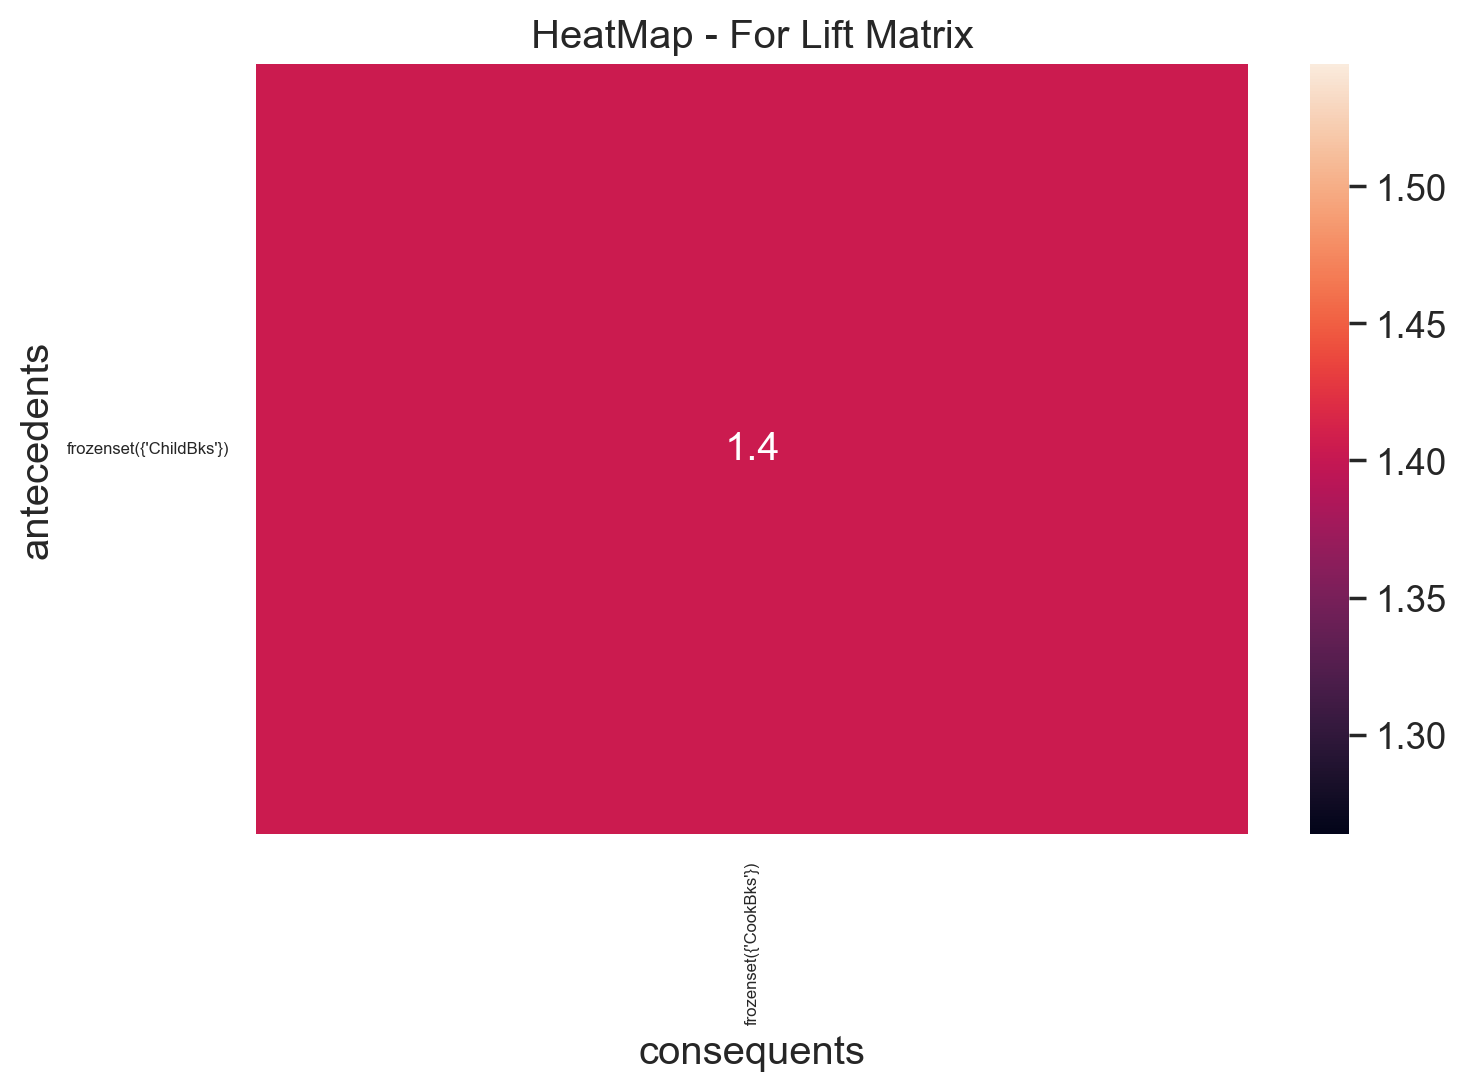

In [25]:
# Heatmap for Lift Matrix
matrix3 = rules3[rules3.lift > 1].pivot(index='antecedents', columns='consequents', values='lift')
plt.figure(figsize=(8, 5), dpi=200)
sns.heatmap(matrix3, annot=True)
plt.title('HeatMap - For Lift Matrix')
plt.yticks(rotation=0, fontsize=6)
plt.xticks(rotation=90, fontsize=6)
plt.show()

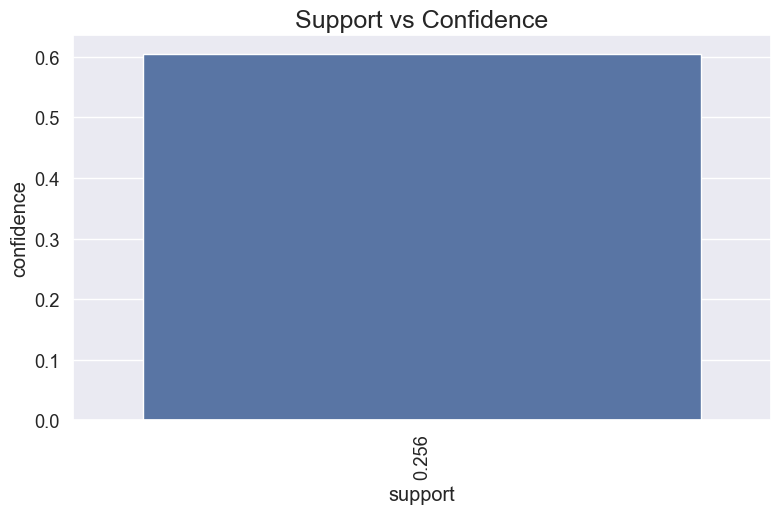

In [26]:
# Bar plot for Support vs Confidence
plt.figure(figsize=(9, 5), dpi=100)
sns.barplot(x="support", y="confidence", data=rules3)
plt.title("Support vs Confidence", fontsize=18)
plt.xticks(rotation=90)
plt.show()

In [27]:
# Print the number of rules for different support and confidence values
print("Number of Rules for 10% Support and 30% Confidence:", len(rules1))
print("Number of Rules for 15% Support and 40% Confidence:", len(rules2))
print("Number of Rules for 20% Support and 60% Confidence:", len(rules3))

Number of Rules for 10% Support and 30% Confidence: 89
Number of Rules for 15% Support and 40% Confidence: 16
Number of Rules for 20% Support and 60% Confidence: 1


### Inference drawn:

#### High Number of Rules with Lower Confidence (10% Support and 30% Confidence):
   - Implication: With a lower confidence threshold, the generated rules may include associations that are not strongly supported by the data. Implementing these rules could lead to recommendations or promotions that may not consistently reflect true patterns in customer behavior.
   - Impact on Book Sale: This approach might result in a variety of book recommendations, but there is a risk of suggesting items that are not reliably associated with each other.

#### Moderate Number of Rules with Moderate Confidence (15% Support and 40% Confidence):
   - Implication: The rules generated with higher confidence are more reliable in capturing meaningful associations in the data. They represent stronger patterns in customer behavior.
   - Impact on Book Sale: Implementing these rules could lead to more targeted and reliable recommendations. This may enhance the likelihood of influencing book sales by suggesting items that are more likely to be purchased together.

#### Few Rules with High Confidence (20% Support and 60% Confidence):
   - Implication: The rules generated with a higher support threshold and confidence level are very strict and capture only the strongest associations. These rules are likely to be highly reliable but may be limited in scope.
   - Impact on Book Sale: Implementing these rules could lead to very specific and focused recommendations. While the number of rules is limited, the likelihood of increased sales for the suggested book combinations is higher due to the high confidence level.